# Interview analysis (NLP)
This project analyzed the interviews of customer discovery for the I-Corps program funded by NSF. The original text files records the intervews of 30 people about their experience and conclusion about cryopreservation from various aspects. 

In [1]:
# load files
filename = 'ProblemInterviews.txt'
file = open(filename, 'rt', encoding="utf8")
text = file.read()
file.close()

In [2]:
# import necessary libries
import string, re
import numpy as np
from PIL import Image
import nltk
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [3]:
# Make all the text lower case
text = text.lower()

In [4]:
# tokenize the speech into a list of strings for each sentence
sentences = sent_tokenize(text)
def remove_punctuation(sentence):
    sentence = re.sub(r'[^\w\s]', '', sentence)
    return sentence
cleaned_sent = [remove_punctuation(sentence) for sentence in sentences]

In [5]:
# tokenize each sentence into words
speech_words = [word_tokenize(sentence) for sentence in cleaned_sent]
print(speech_words[0:5])

[['maria', 'susana', 'albano', 'director', 'of', 'quality', 'control', 'laboratory', 'national', 'cord', 'blood', 'program', 'at', 'new', 'york', 'blood', 'center', 'sample', 'prep', 'for', 'cryopreservation', 'fda', 'cell', 'therapy', 'cord', 'blood', 'product'], ['frozen', 'in', '10', 'dmso'], ['cells', 'are', 'concentrated', 'mononuclear', 'cell', 'fraction', 'is', 'separated'], ['10', 'dmso', 'is', 'added', 'slowly', 'at', 'a', 'specific', 'volumeminute', 'with', 'a', 'timer'], ['a', 'controlled', 'rate', 'freezer', 'is', 'used', 'for', 'freezing']]


In [6]:
# remove stop words
stop_words = set(stopwords.words("english"))
filtered = [[word for word in sent if word not in stop_words] for sent in speech_words]
print(filtered[0:5])

[['maria', 'susana', 'albano', 'director', 'quality', 'control', 'laboratory', 'national', 'cord', 'blood', 'program', 'new', 'york', 'blood', 'center', 'sample', 'prep', 'cryopreservation', 'fda', 'cell', 'therapy', 'cord', 'blood', 'product'], ['frozen', '10', 'dmso'], ['cells', 'concentrated', 'mononuclear', 'cell', 'fraction', 'separated'], ['10', 'dmso', 'added', 'slowly', 'specific', 'volumeminute', 'timer'], ['controlled', 'rate', 'freezer', 'used', 'freezing']]


In [7]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemm_review = [[lemmatizer.lemmatize(word) for word in sent] for sent in filtered]
print(lemm_review[0:5])

[['maria', 'susana', 'albano', 'director', 'quality', 'control', 'laboratory', 'national', 'cord', 'blood', 'program', 'new', 'york', 'blood', 'center', 'sample', 'prep', 'cryopreservation', 'fda', 'cell', 'therapy', 'cord', 'blood', 'product'], ['frozen', '10', 'dmso'], ['cell', 'concentrated', 'mononuclear', 'cell', 'fraction', 'separated'], ['10', 'dmso', 'added', 'slowly', 'specific', 'volumeminute', 'timer'], ['controlled', 'rate', 'freezer', 'used', 'freezing']]


In [8]:
# parts of speech tagging
POS = [nltk.pos_tag(tokenized_sent) for tokenized_sent in filtered ]
print(POS[:3])

[[('maria', 'NNS'), ('susana', 'VBP'), ('albano', 'JJ'), ('director', 'NN'), ('quality', 'NN'), ('control', 'NN'), ('laboratory', 'JJ'), ('national', 'JJ'), ('cord', 'NN'), ('blood', 'NN'), ('program', 'NN'), ('new', 'JJ'), ('york', 'NN'), ('blood', 'NN'), ('center', 'NN'), ('sample', 'NN'), ('prep', 'JJ'), ('cryopreservation', 'NN'), ('fda', 'NN'), ('cell', 'NN'), ('therapy', 'NN'), ('cord', 'NN'), ('blood', 'NN'), ('product', 'NN')], [('frozen', 'JJ'), ('10', 'CD'), ('dmso', 'NN')], [('cells', 'NNS'), ('concentrated', 'VBD'), ('mononuclear', 'JJ'), ('cell', 'NN'), ('fraction', 'NN'), ('separated', 'VBD')]]


In [9]:
speech_words = Text(word_tokenize(text))
speech_words.concordance('cryopreservation')

Displaying 25 of 54 matches:
k blood center sample prep for cryopreservation - fda cell therapy cord blood 
 face many challenges with the cryopreservation of the product - the biggest c
 recovery - what if success of cryopreservation depends on the history of the 
 few things be different about cryopreservation : more streamlined protocols ,
 are very interested in tissue cryopreservation . freezing is classic - 10 % d
vel , other than the fact that cryopreservation is a manual process ( ie screw
ssing issue ( washing ) than a cryopreservation issue . they would like to see
olled rate freezer to do their cryopreservation . their process is semi-automa
oblems that they have had with cryopreservation . in addition , it is common f
, he sees processing cells for cryopreservation analogous to cell passaging . 
 willing to move into a better cryopreservation system if it becomes available
out the practice of automating cryopreservation . lagen laboratories based at 
essed a desire to speed

In [10]:
speech_words = Text(word_tokenize(text))
speech_words.concordance('DMSO')

Displaying 25 of 63 matches:
 cord blood product . frozen in 10 % dmso . cells are concentrated , mononucle
ar cell fraction is separated . 10 % dmso is added slowly at a specific volume
ized tubes/equipment . they only use dmso and serum as their cryoprotectant , 
personally documented the effects of dmso on cells but they operate under the 
a , and a final concentration of 5 % dmso . they allow between 30-60 minutes t
rvation . freezing is classic - 10 % dmso , 1 deg c/min . when freezing cartil
rep for research cells involves 10 % dmso and freezing in a mr. frosty . depen
lls , they freeze stem cells in 10 % dmso . for some cell types , they use cry
ragile and need to be frozen in 10 % dmso and 90 % serum . for clinical cells 
like to see the field move away from dmso . dr. ritz has seen some patients su
fer adverse reactions to infusion of dmso . he knows there are some dmso free 
on of dmso . he knows there are some dmso free solutions out there but hasn ’ 
sc , tils ) . hscs are 

# Word Cloud
The last part visuaize the cleand text with a word cloud. 

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=40,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(25, 25))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

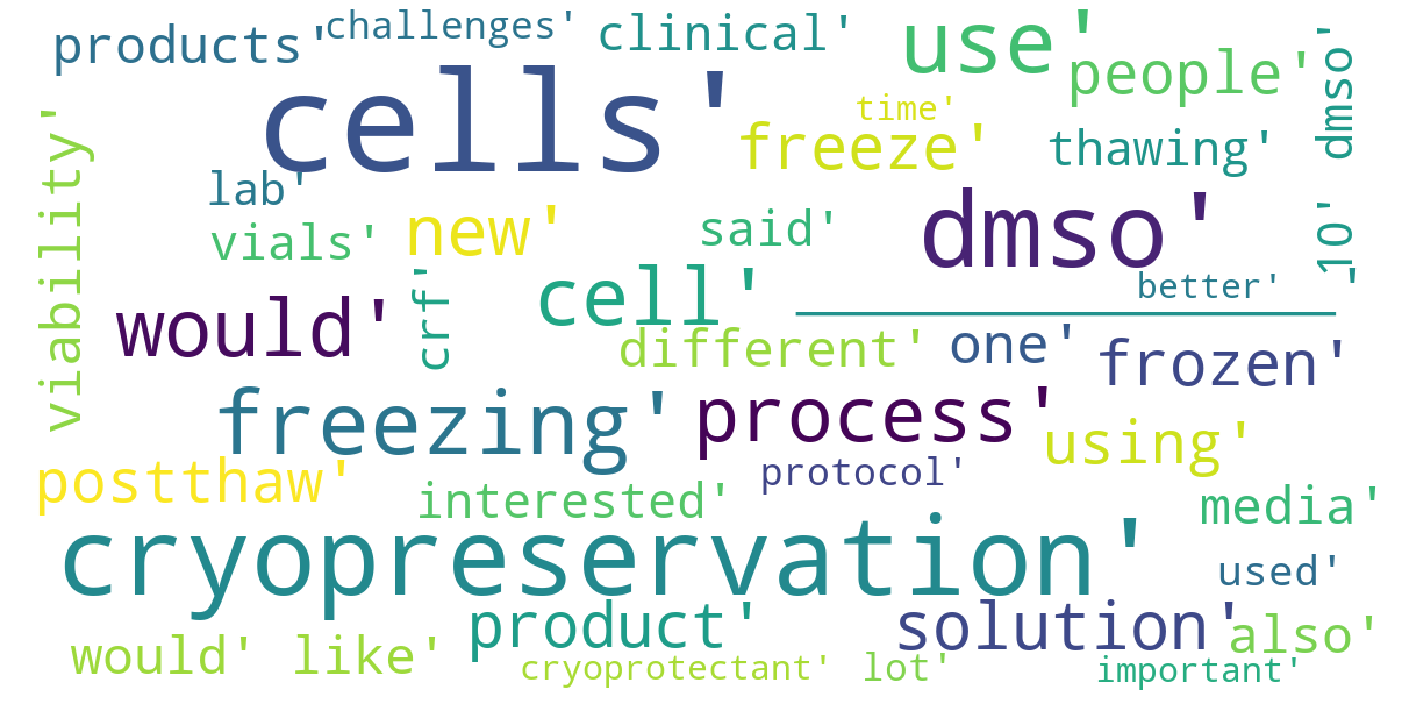

In [12]:
show_wordcloud(filtered)